# 융합전자공학부 2015003654 이호영 HW2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

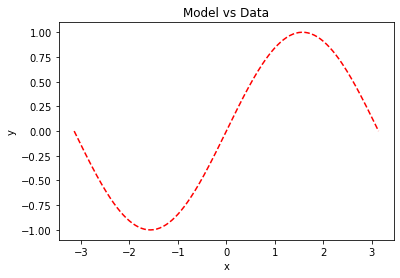

In [2]:
x = np.linspace(-1*np.pi,np.pi,200)
y = np.sin(x)
x_train = np.linspace(-1*np.pi,np.pi,21)
y_train = np.sin(x_train)+ np.random.normal(0,0.5,21)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model vs Data')
plt.plot(x,y,'r--')
plt.show()

In [3]:
# MSE 함수
# y_pred가 2차원 배열이기 때문에 reshpae(-1)로 1차원으로 바꾼다.
def MSE(y_pred, y):
    return np.mean((y_pred.reshape(-1) - y) ** 2)

In [4]:
# Xw = y_pred에서 2차원 배열 X를 초기화하기 위한 함수
def initArray(arr, degree):    
    initArr = np.zeros((arr.shape[0], degree + 1))
    for deg in range(degree + 1):
        initArr[:, deg] = arr ** deg
    return initArr

In [5]:
# (X_transpose @ X)w_ols = (X_transpose @ y_pred)를 풀어서 w_ols를 구함
# X와 w_ols를 곱해서 y_pred를 구함
def polyRegression(X,y):
    A = np.dot(X.T,X)
    b = np.dot(X.T,y.reshape(-1,1))
    weight = (np.linalg.inv(A).dot(b)).reshape(-1,1)
    y_pred = X.dot(weight)
    return weight, y_pred

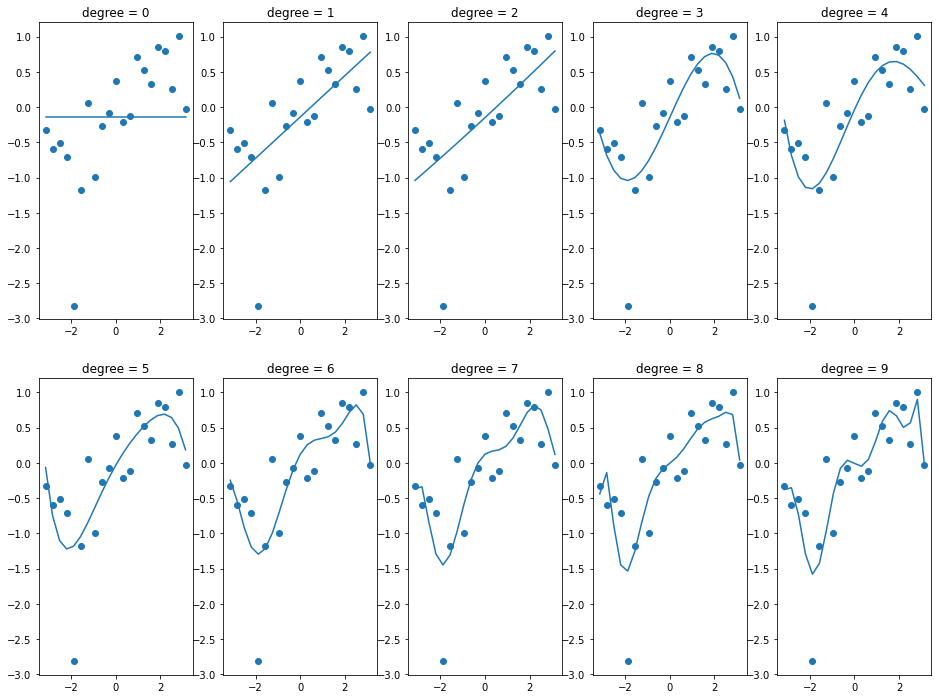

In [6]:
plt.figure(figsize=(16,12))
num = 1
MSE_train = []

for deg in range(10):

    X_train = initArray(x_train, deg)
    weight, y_train_pred = polyRegression(X_train, y_train)
    
    MSE_train.append(MSE(y_train_pred, y_train))

    plt.subplot(2,5,num)
    plt.title(f'degree = {deg}')
    plt.scatter(x_train,y_train)
    plt.plot(x_train,y_train_pred)
    num += 1

plt.show()

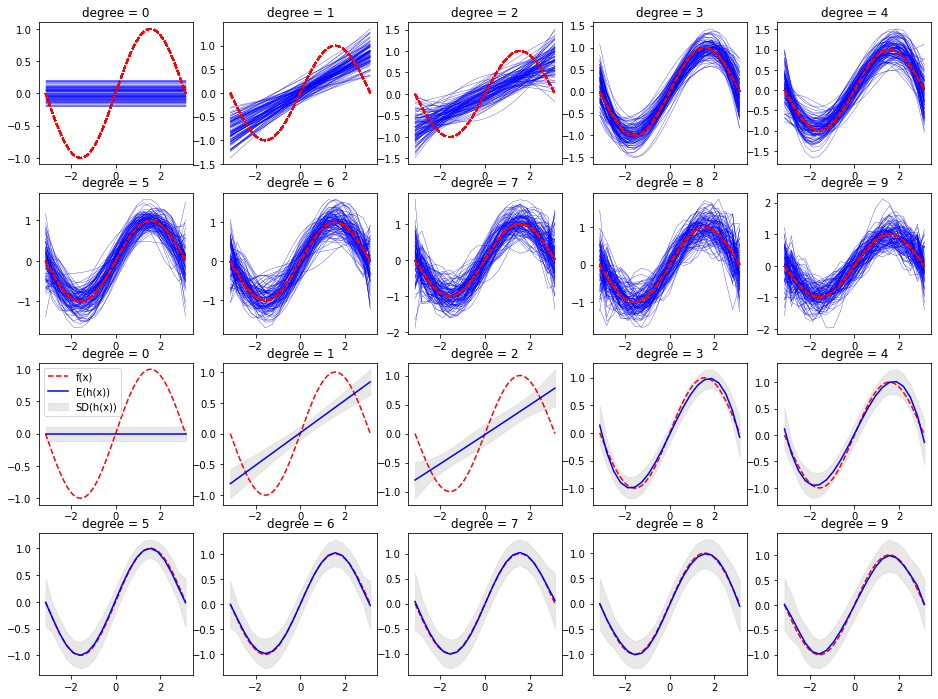

In [7]:
plt.figure(figsize=(16,12))
num = 1
train_cnt = 100
degree = 10
bias_2 = np.zeros((degree,21))
var = np.zeros((degree,21))
E_bias_2 = []
E_var = []

for deg in range(degree):
    plt.subplot(4,5,num)
    plt.title(f'degree = {deg}')
    X_train = initArray(x_train, deg)
    Y_pred = np.zeros((train_cnt,21))
    for epoch in range(train_cnt):
        plt.plot(x,y,'r--')
        y_train = np.sin(x_train)+ np.random.normal(0,0.5,21)
        weight, y_train_pred = polyRegression(X_train, y_train)
        plt.plot(x_train,y_train_pred,linewidth = 0.3,color = 'b')
        # y_train_pred.shape = (21,), y_train_pred.T.shape = (21)
        Y_pred[epoch,:]= y_train_pred.T
    
    # row vector의 column 방향으로 mean과 std을 계산
    total_mean = np.mean(Y_pred,axis =0)
    total_std = np.std(Y_pred,axis =0)
    bias_2 = (total_mean - np.sin(x_train))**2
    var = total_std **2
    E_bias_2.append(np.mean(bias_2))
    E_var.append(np.mean(var))
    
    plt.subplot(4,5,num+10)
    plt.title(f'degree = {deg}')
    plt.plot(x,y,'r--',label="f(x)")
    plt.plot(x_train,total_mean,color = 'b',label='E(h(x))')
    plt.fill_between(x_train,total_mean+total_std,total_mean-total_std,color='lightgray',alpha=0.5,label='SD(h(x))')
    if(num+10 == 11):
        plt.legend()
    num+=1
plt.show()

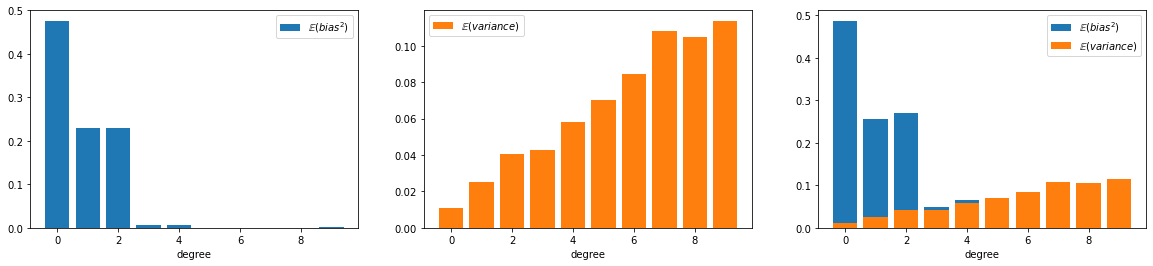

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.bar(range(degree),E_bias_2,label="$\mathbb{E}(bias^2)$")
plt.xlabel("degree")
plt.legend()

plt.subplot(1,3,2)
plt.bar(range(degree),E_var,label="$\mathbb{E}(variance)$",color="#ff7f0e")
plt.xlabel("degree")
plt.legend()

plt.subplot(1,3,3)
plt.bar(range(degree),E_bias_2,bottom=E_var)
plt.bar(range(degree),E_var)
plt.xlabel("degree")
plt.legend(['$\mathbb{E}(bias^2)$','$\mathbb{E}(variance)$'])
plt.show()